In [99]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [100]:
df = pd.read_csv('csv/df.csv')
df

,Zone,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%),cluster_cah
0,Afghanistan,12.593362,1.53,0.54,2096.1,-2.80,36296113.0,50.88,49.12,3
1,Afrique du Sud,10.667160,35.69,14.11,13950.5,-0.28,57009756.0,24.27,78.71,3
2,Albanie,10.705471,16.36,6.26,12771.0,0.38,2884169.0,80.85,27.66,1
3,Algérie,0.629575,6.38,1.97,11809.5,-0.92,41389189.0,0.72,99.28,3
4,Allemagne,7.456452,19.47,7.96,53071.5,0.59,82658409.0,48.42,87.06,2
...,...,...,...,...,...,...,...,...,...,...
154,Égypte,-26.032905,12.96,4.51,10435.9,-1.42,96442591.0,8.80,89.44,2
155,Émirats arabes unis,-16.186703,43.47,14.80,71182.4,0.62,9487203.0,105.10,11.65,1
156,Équateur,5.643634,19.31,6.15,11679.4,-0.07,16785361.0,0.00,99.71,1
157,Éthiopie,12.413311,0.13,0.04,1988.0,-1.68,106399924.0,7.14,100.00,2


In [101]:
df.set_index('Zone',inplace=True)

In [102]:
def df_boxplot(df,labels):
    num_cols = len(df.columns)

    num_rows = num_cols // 2
    if num_cols % 2:
        num_rows += 1

    plt.figure(figsize=(10,4*num_rows))

    for i, column in enumerate(df.columns, start=1):
        plt.subplot(num_rows,2, i)
        sns.boxplot(x=labels, y=column, data=df)
        plt.title(column)
    plt.tight_layout()
    plt.show()

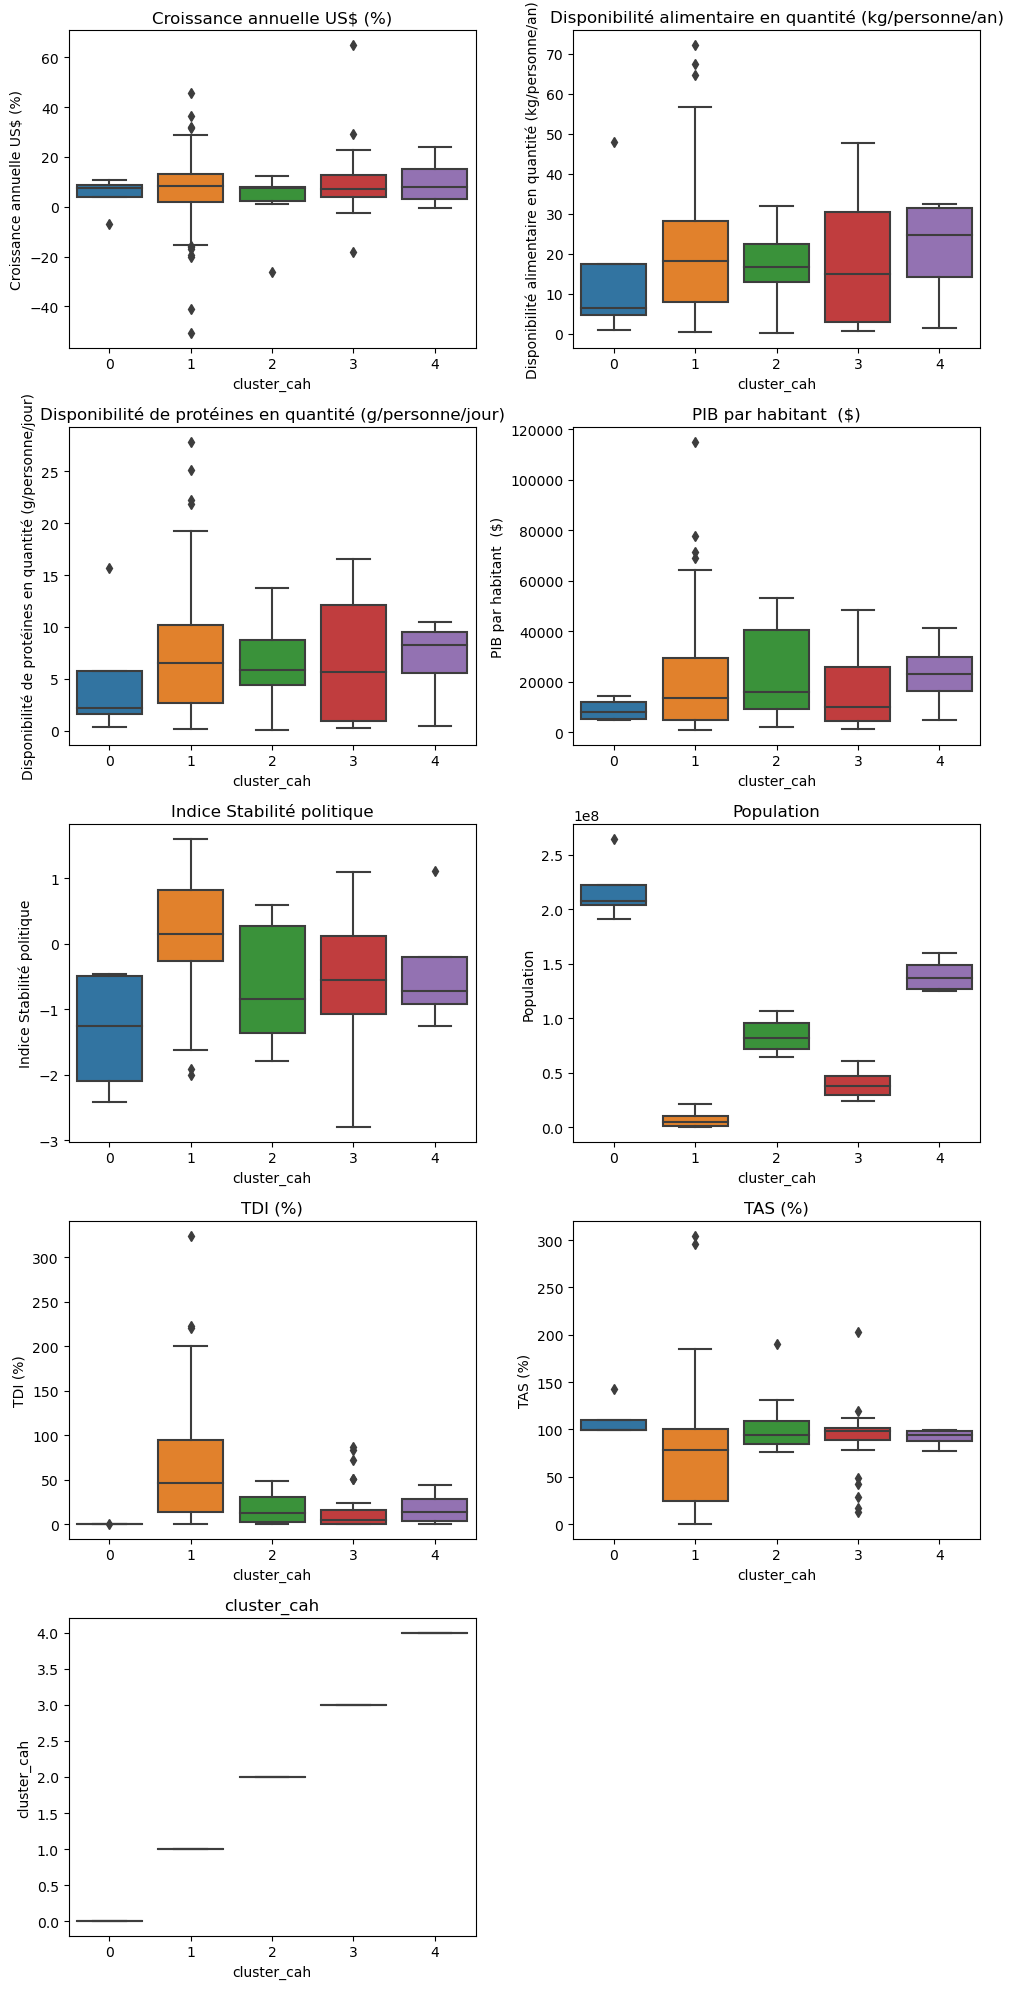

In [103]:
# boxplot sur la colonne cluster cah
df_boxplot(df,'cluster_cah')

In [104]:
# taux d'auto suffisance alimentaire
df.sort_values(by = ['TAS (%)'], ascending = False).head()

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%),cluster_cah
Zone,,,,,,,,,
Belgique,5.689177,12.65,4.57,50442.3,0.43,11419748.0,222.37,304.61,1
Pays-Bas,7.084572,20.33,8.48,55088.6,0.92,17021347.0,163.44,295.70,1
Pologne,6.254645,30.30,12.14,29958.1,0.52,37953180.0,4.76,203.37,3
Thaïlande,7.582167,12.95,4.35,17008.0,-0.75,69209810.0,0.23,190.24,2
Hongrie,26.512363,25.27,9.80,29501.1,0.81,9729823.0,21.80,185.34,1


In [105]:
df.sort_values(by = ['TDI (%)'], ascending = False).head()

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%),cluster_cah
Zone,,,,,,,,,
Chine - RAS de Hong-Kong,7.187729,53.51,22.26,59842.2,0.83,7306322.0,323.93,8.57,1
Belgique,5.689177,12.65,4.57,50442.3,0.43,11419748.0,222.37,304.61,1
Timor-Leste,-16.786624,4.24,1.46,3138.4,0.07,1243258.0,220.00,20.00,1
Îles Salomon,21.537283,4.45,1.51,2625.1,0.20,636039.0,200.00,0.00,1
Gambie,-5.498309,3.53,1.24,1927.0,-0.08,2213889.0,200.00,25.00,1


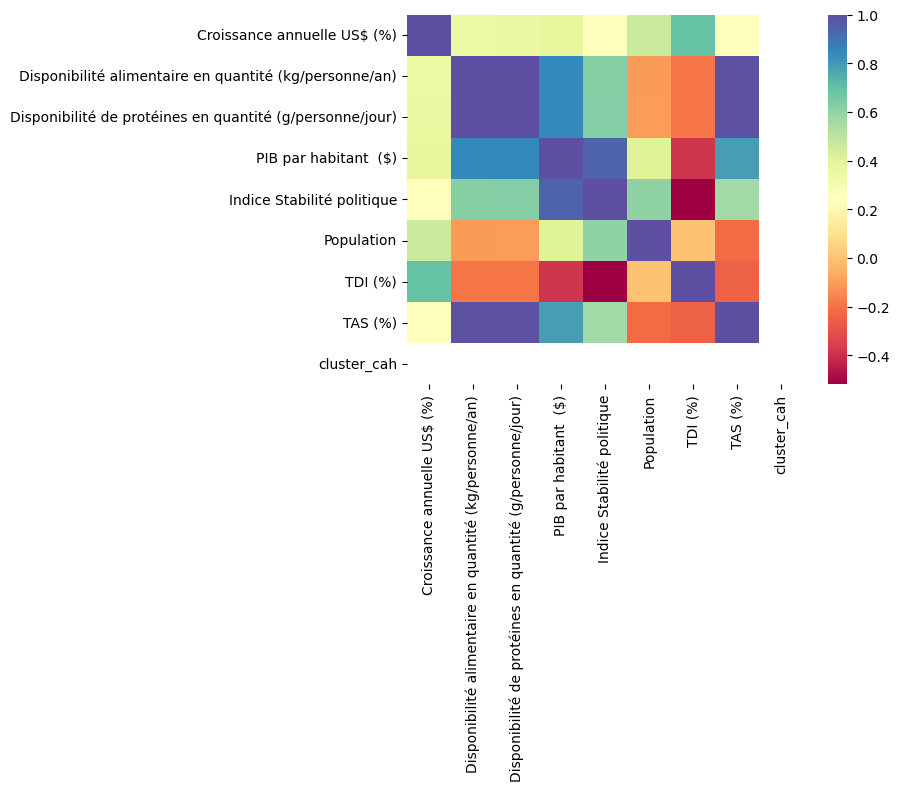

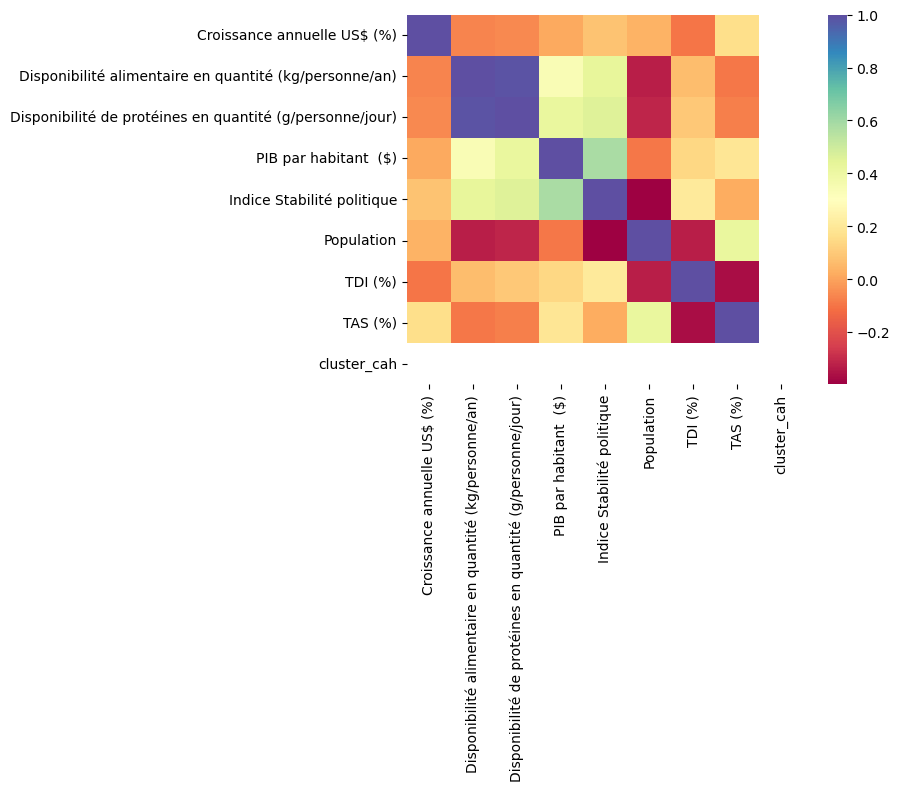

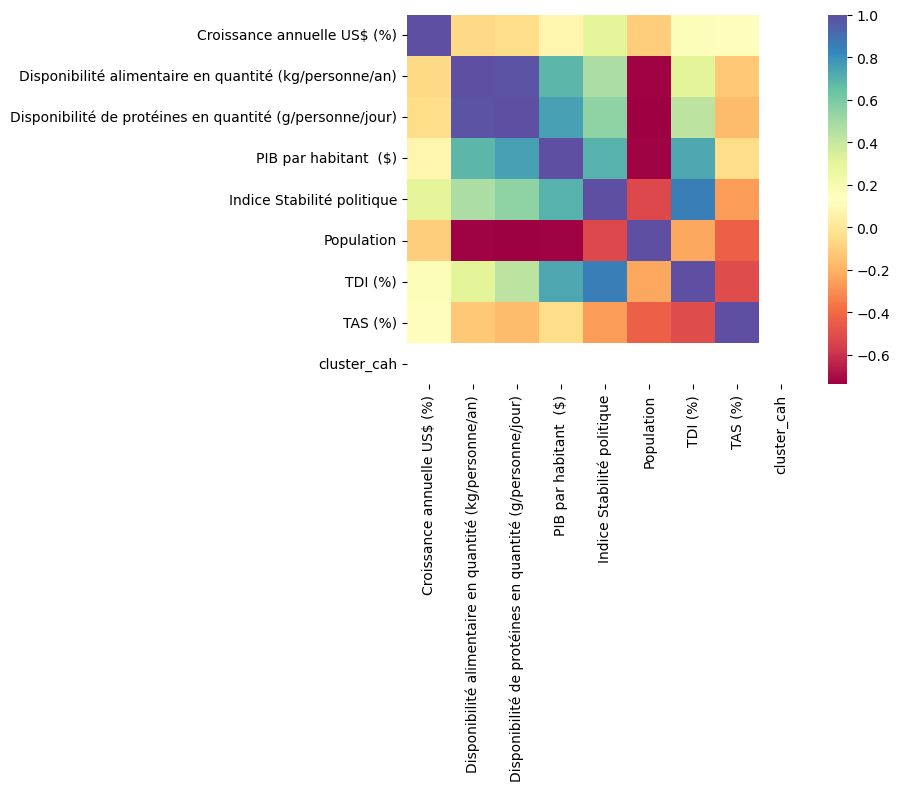

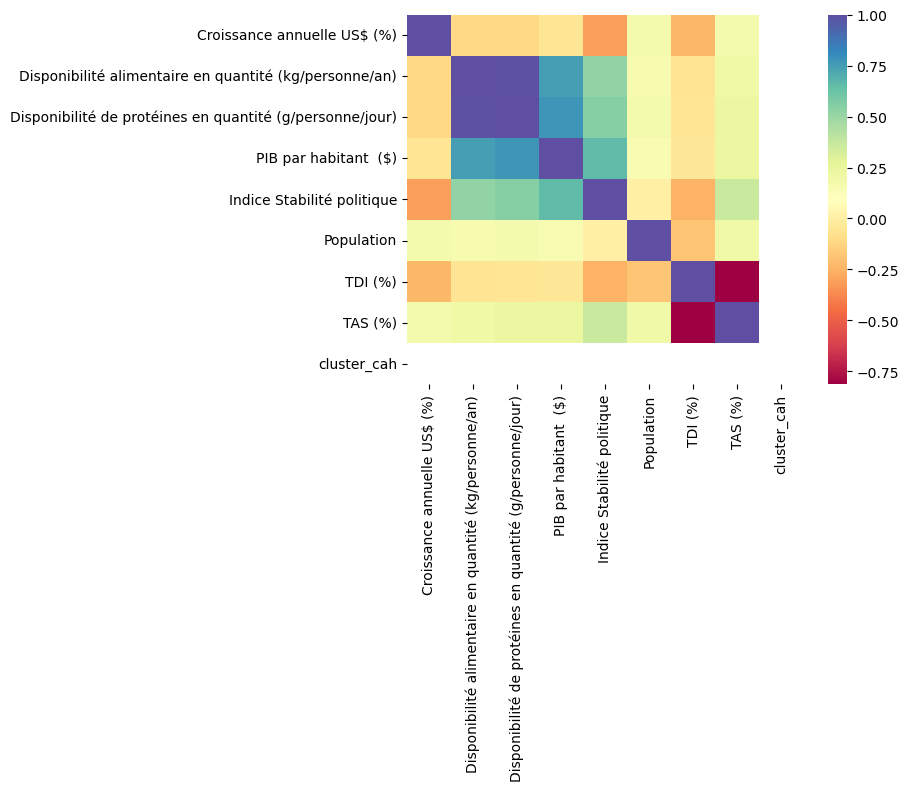

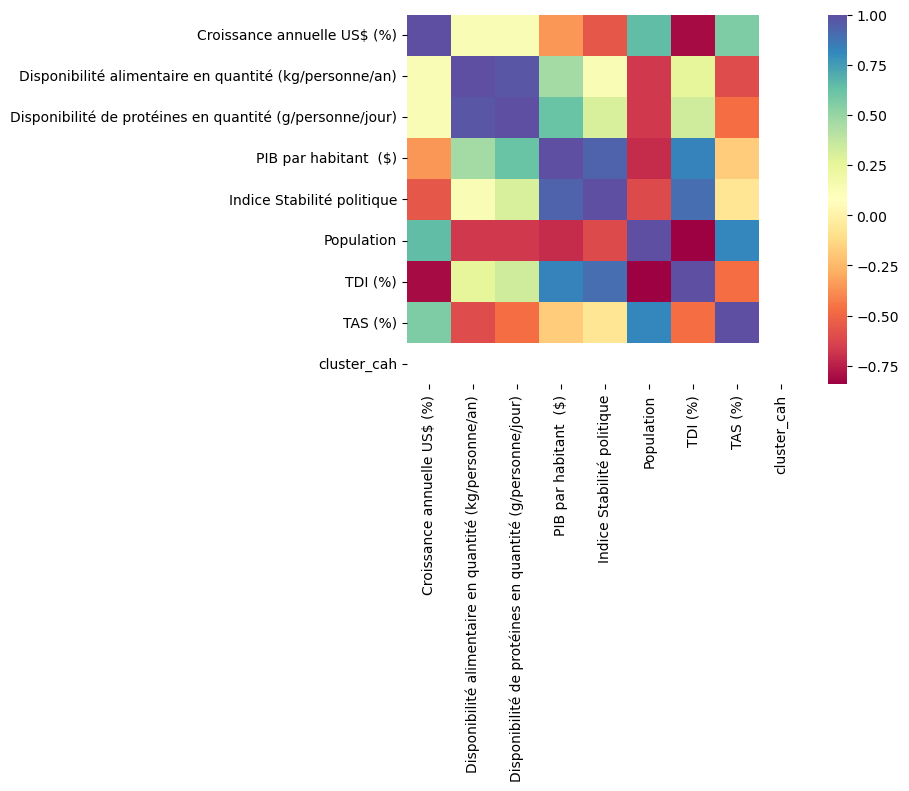

In [106]:
# heatmap de corrélations entre les différentes variables dans chaque cluster

groupe=(df.loc[lambda df: df.cluster_cah == 0],df.loc[lambda df: df.cluster_cah == 1],df.loc[lambda df: df.cluster_cah == 2],df.loc[lambda df: df.cluster_cah == 3],df.loc[lambda df: df.cluster_cah == 4])
for n in groupe:
    sns.heatmap(n.corr(),cmap='Spectral')
    plt.show()

<h2> K-Means


In [107]:
df_kmeans = df.drop(columns=['cluster_cah'])

In [108]:
df_kmeans.sort_values(by = 'Population', ascending = False)

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
Zone,,,,,,,,
Indonésie,7.590957,7.19,2.42,10941.9,-0.50,264650963.0,0.04,99.05
Pakistan,10.924334,5.86,1.97,4891.7,-2.41,207906209.0,0.16,99.92
Brésil,7.768977,48.03,15.68,14477.9,-0.47,207833823.0,0.03,142.27
Nigéria,-7.033202,1.01,0.31,5120.0,-2.00,190873244.0,0.00,99.50
Bangladesh,12.047445,1.50,0.47,4830.8,-1.26,159685424.0,0.00,99.60
...,...,...,...,...,...,...,...,...
Grenade,25.930975,45.70,15.50,14870.0,1.01,110874.0,87.50,12.50
Saint-Vincent-et-les Grenadines,1.523463,72.31,25.10,13633.0,0.89,109827.0,112.50,0.00
Antigua-et-Barbuda,22.427243,54.10,17.77,20777.9,0.75,95426.0,100.00,0.00


In [109]:
# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Applique StandardScaler to X
X_normalized = sc.fit_transform(df_kmeans)

In [110]:
# on crée une liste dans laquelle on stocke les inerties
inerties=[]
indice=[]
# on fait une boucle de 1 à 10 pour tester toutes ces possibiliéts
for i in range(1, 11):
    # pour chaque k, on crée un modèle et on l’ajuste
    kmeans=KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(X_normalized)
    # on stocke l’inertie associée
    inerties.append(kmeans.inertia_)
    indice.append(i)
    print("WCSS for K={} --> {}".format(indice, inerties[-1]))

WCSS for K=[1] --> 1272.0000000000002
WCSS for K=[1, 2] --> 953.6111873279807
WCSS for K=[1, 2, 3] --> 830.4471486237004
WCSS for K=[1, 2, 3, 4] --> 708.4606492618603
WCSS for K=[1, 2, 3, 4, 5] --> 696.5157864021762
WCSS for K=[1, 2, 3, 4, 5, 6] --> 607.1513775104243
WCSS for K=[1, 2, 3, 4, 5, 6, 7] --> 529.9329763480832
WCSS for K=[1, 2, 3, 4, 5, 6, 7, 8] --> 516.3196656966825
WCSS for K=[1, 2, 3, 4, 5, 6, 7, 8, 9] --> 483.0567710927108
WCSS for K=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] --> 439.22075795249197


In [111]:
import plotly.express as px

# Create DataFrame
inerties_frame = pd.DataFrame(inerties)
k_frame = pd.Series(indice)

# Create figure
fig= px.line(
    inerties_frame,
    x=k_frame,
    y=inerties_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [112]:
# moyenne silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels
for i in range (2,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X_normalized)
    sil.append(silhouette_score(X_normalized, kmeans.predict(X_normalized)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=2 is 0.2443295408723824


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=3 is 0.21936509690882036


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=4 is 0.23293067824561375


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=5 is 0.23932243294057756


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=6 is 0.252113314469017


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=7 is 0.20845099340906556


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=8 is 0.23375022361612707


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=9 is 0.23708606735141355


C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=10 is 0.19268809875818405


In [113]:
# création d'une dataframe
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# barchart
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y=cluster_scores.iloc[:, -1]
            )

# ajout des titres
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [114]:
kmeans = KMeans(n_clusters=6, random_state=0)

# Fit kmeans le dataset
kmeans.fit(X_normalized)

C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [115]:
labels = kmeans.labels_
df['cluster_kmeans'] = kmeans.labels_

In [116]:
clusters_stats = df.groupby('cluster_kmeans').mean()
clusters_stats

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%),cluster_cah
cluster_kmeans,,,,,,,,,
0,10.163206,9.964583,3.340625,7064.225000,-0.682917,2.289410e+07,13.016042,94.373750,1.708333
1,2.475351,11.671818,4.037273,8407.251515,-0.066364,6.173014e+06,99.019697,22.474545,1.181818
2,5.021400,16.850833,5.545000,12449.408333,-1.257500,1.475886e+08,5.082500,101.402500,1.833333
3,6.386874,16.490000,6.525000,52765.450000,0.675000,1.422055e+07,192.905000,300.155000,1.000000
4,4.142570,52.131250,18.040000,29019.731250,0.568125,4.248968e+06,88.174375,30.566250,1.125000
5,10.139066,26.102917,9.648958,37381.933333,0.642708,1.991907e+07,32.982500,100.528750,1.500000


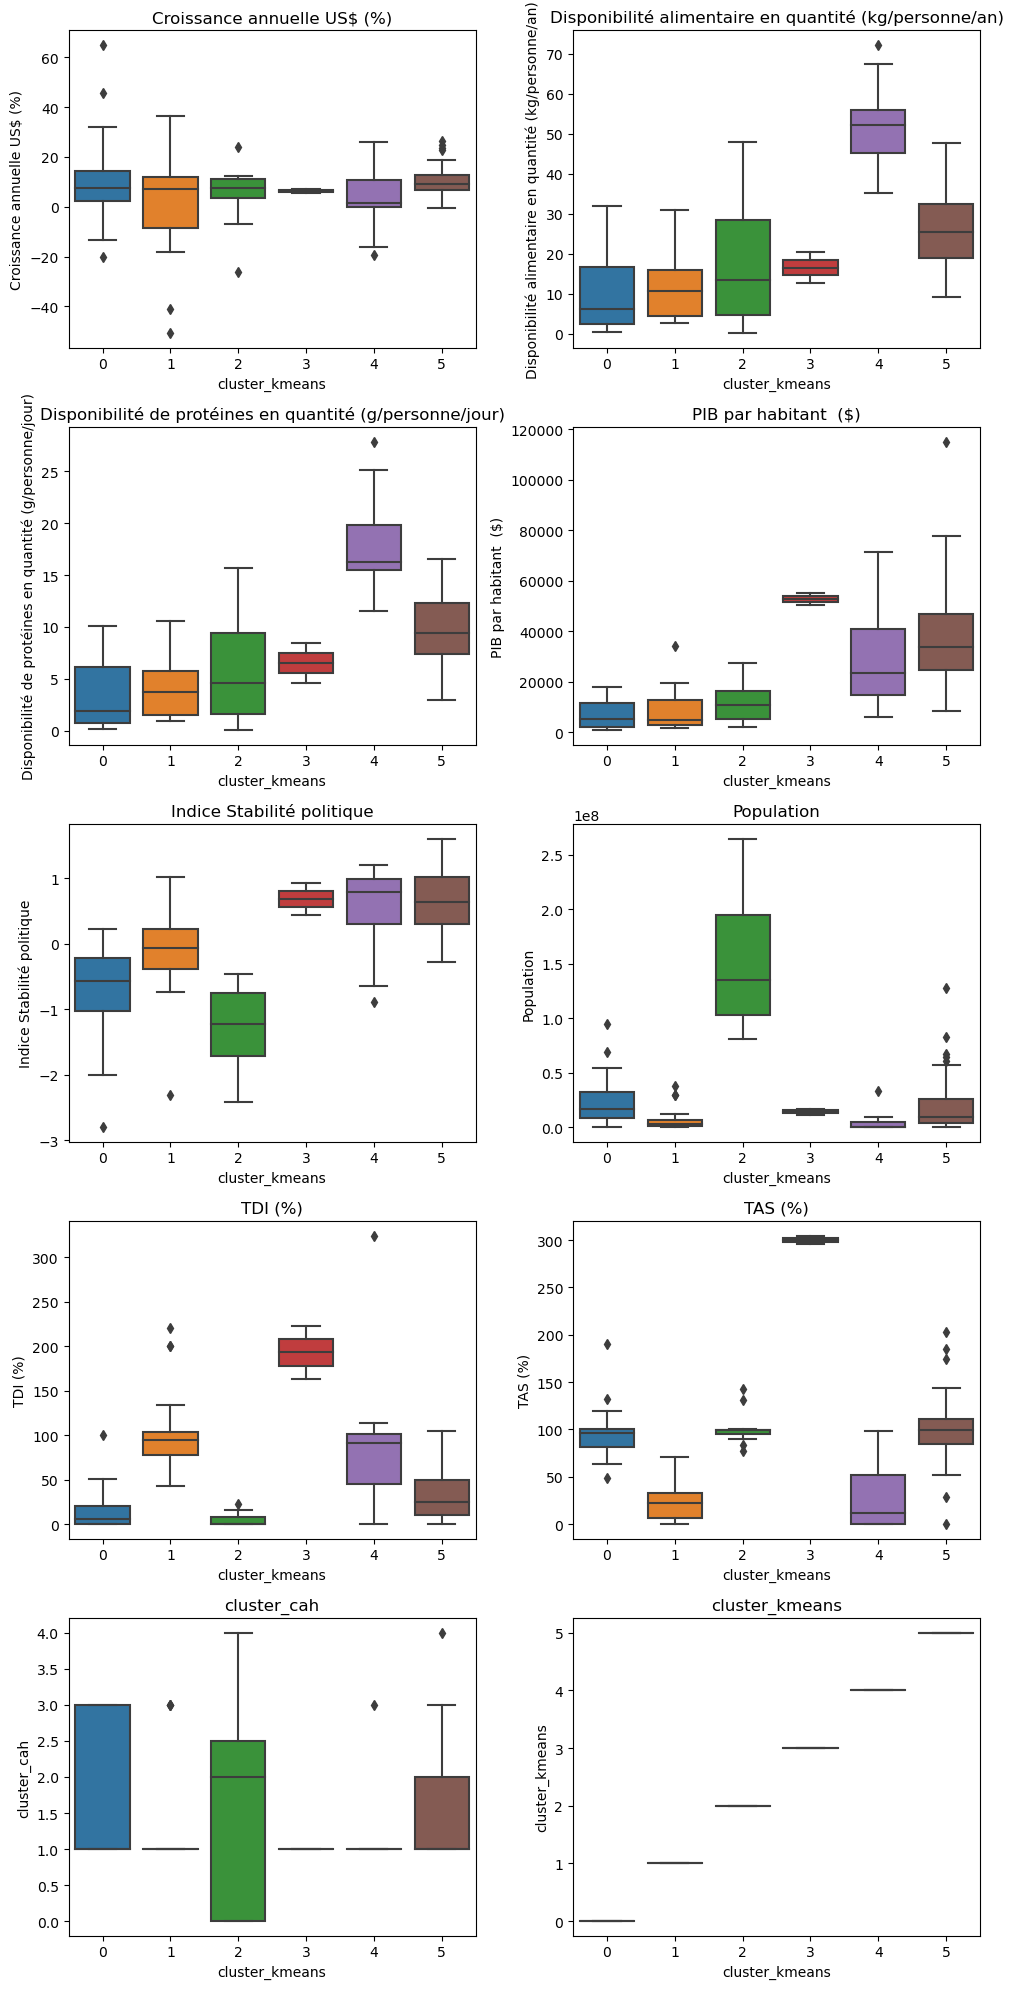

In [117]:
df_boxplot(df,'cluster_kmeans')

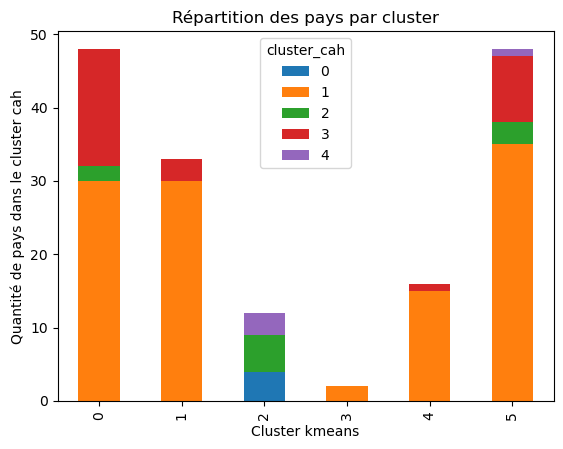

In [118]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(df['cluster_kmeans'], df['cluster_cah'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster kmeans')
plt.ylabel('Quantité de pays dans le cluster cah')
plt.title('Répartition des pays par cluster')

# Afficher le graphique
plt.show()

In [119]:
#Pour les cluster issus de la CAH:
print(df.groupby(df['cluster_kmeans']).size())

#Pour les clusters issus du K-means:
print(df.groupby(df['cluster_cah']).size())

cluster_kmeans
0    48
1    33
2    12
3     2
4    16
5    48
dtype: int64
cluster_cah
0      4
1    112
2     10
3     29
4      4
dtype: int64


In [120]:
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[ 0.19810513, -0.64306204, -0.67476441, -0.66360727, -0.71666034,
        -0.07111669, -0.6353408 ,  0.32979023],
       [-0.37785369, -0.53405311, -0.54889452, -0.59299651, -0.01279341,
        -0.46010487,  1.01523815, -1.119017  ],
       [-0.18710874, -0.20336696, -0.27647926, -0.38047669, -1.37261398,
         2.82969293, -0.78760104,  0.47142328],
       [-0.08481014, -0.22640659, -0.09941344,  1.73917339,  0.83355932,
        -0.27289238,  2.8170814 ,  4.47639193],
       [-0.25294898,  2.04932871,  1.98110986,  0.49072209,  0.71154909,
        -0.50486461,  0.80709514, -0.95596485],
       [ 0.19629656,  0.38738933,  0.46502148,  0.93037196,  0.79669463,
        -0.14032573, -0.25214528,  0.45381676]])

C:\Users\micka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



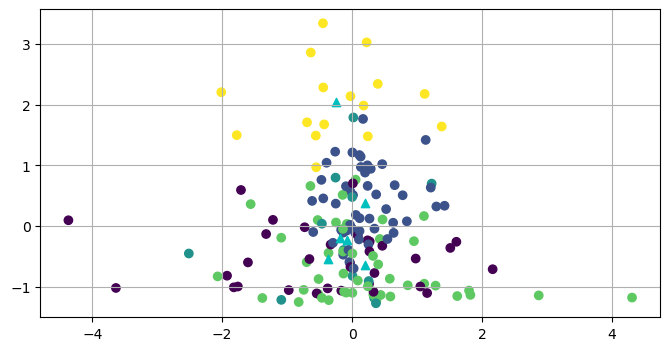

Inertie totale : 618.2461891536863


In [121]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=5)
model.fit(X_normalized)
model.predict(X_normalized)
plt.scatter(X_normalized[:,0], X_normalized[:,1],c=model.predict(X_normalized))
plt.scatter(centroids[:,0], centroids[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

<h2> ACP : Analyse en composante principal

In [122]:
df_kmeans


,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
Zone,,,,,,,,
Afghanistan,12.593362,1.53,0.54,2096.1,-2.80,36296113.0,50.88,49.12
Afrique du Sud,10.667160,35.69,14.11,13950.5,-0.28,57009756.0,24.27,78.71
Albanie,10.705471,16.36,6.26,12771.0,0.38,2884169.0,80.85,27.66
Algérie,0.629575,6.38,1.97,11809.5,-0.92,41389189.0,0.72,99.28
Allemagne,7.456452,19.47,7.96,53071.5,0.59,82658409.0,48.42,87.06
...,...,...,...,...,...,...,...,...
Égypte,-26.032905,12.96,4.51,10435.9,-1.42,96442591.0,8.80,89.44
Émirats arabes unis,-16.186703,43.47,14.80,71182.4,0.62,9487203.0,105.10,11.65
Équateur,5.643634,19.31,6.15,11679.4,-0.07,16785361.0,0.00,99.71


In [123]:
df_acp = df.drop(['cluster_kmeans','cluster_cah'],axis=1)

In [124]:
df_acp

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
Zone,,,,,,,,
Afghanistan,12.593362,1.53,0.54,2096.1,-2.80,36296113.0,50.88,49.12
Afrique du Sud,10.667160,35.69,14.11,13950.5,-0.28,57009756.0,24.27,78.71
Albanie,10.705471,16.36,6.26,12771.0,0.38,2884169.0,80.85,27.66
Algérie,0.629575,6.38,1.97,11809.5,-0.92,41389189.0,0.72,99.28
Allemagne,7.456452,19.47,7.96,53071.5,0.59,82658409.0,48.42,87.06
...,...,...,...,...,...,...,...,...
Égypte,-26.032905,12.96,4.51,10435.9,-1.42,96442591.0,8.80,89.44
Émirats arabes unis,-16.186703,43.47,14.80,71182.4,0.62,9487203.0,105.10,11.65
Équateur,5.643634,19.31,6.15,11679.4,-0.07,16785361.0,0.00,99.71


In [125]:
sc.fit(df_acp)

StandardScaler()

In [126]:
X_scaled = sc.transform(df_acp)
X_scaled[:5]

array([[ 0.38016756, -1.18162   , -1.18077966, -0.92481065, -3.13355696,
         0.24065895,  0.09134288, -0.58209691],
       [ 0.23586033,  0.99953576,  1.27103981, -0.30155552, -0.25668415,
         0.72252741, -0.41935525,  0.01415733],
       [ 0.23873052, -0.23470724, -0.14729348, -0.36356873,  0.49678255,
        -0.53661438,  0.66652601, -1.01452733],
       [-0.51613557, -0.87194186, -0.92240811, -0.41412041, -0.98731851,
         0.35914089, -0.87132598,  0.42865378],
       [-0.00467952, -0.03613012,  0.1598615 ,  1.75526423,  0.73652195,
         1.31920068,  0.04413065,  0.18241428]])

In [127]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [128]:
n_components = 4
pca = PCA(n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [129]:
pca.explained_variance_ratio_

array([0.35775888, 0.20777182, 0.13852241, 0.11007612])

<h4> Ici la première variance est de 31 % la deuxieme est de 20% etc

In [130]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([35.78, 20.78, 13.85, 11.01])

In [131]:
scree_cum = scree.cumsum().round()
scree_cum

array([36., 57., 70., 81.])

In [132]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

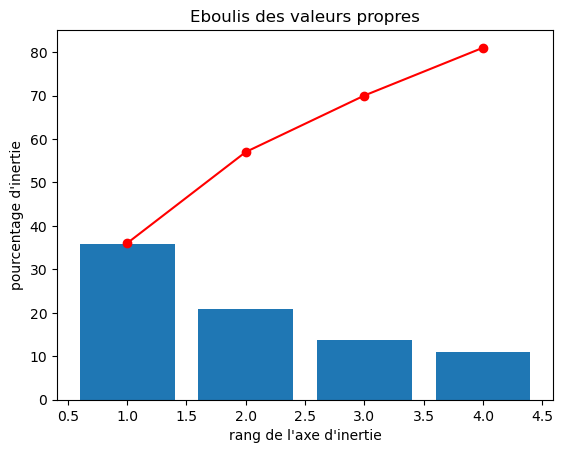

In [133]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

<h4> On voit ici que un peu plus de 70% de la variance est comprise entre les 4 premieres composantes.

In [134]:
# création de la matrice de corrélation
pcs = pca.components_
pcs = pd.DataFrame(pcs)

In [135]:
# création de la matrice de corrélation avec les columns pour une meilleur compréhension
pcs.columns = df_acp.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
F1,-0.05,0.50,0.51,0.40,0.46,-0.23,0.23,-0.09
F2,0.18,0.22,0.22,0.22,-0.06,0.42,-0.55,0.58
F3,-0.66,0.30,0.26,-0.23,-0.33,0.39,-0.07,-0.30
F4,0.68,0.31,0.27,-0.41,-0.25,-0.01,-0.06,-0.36


<Axes: >

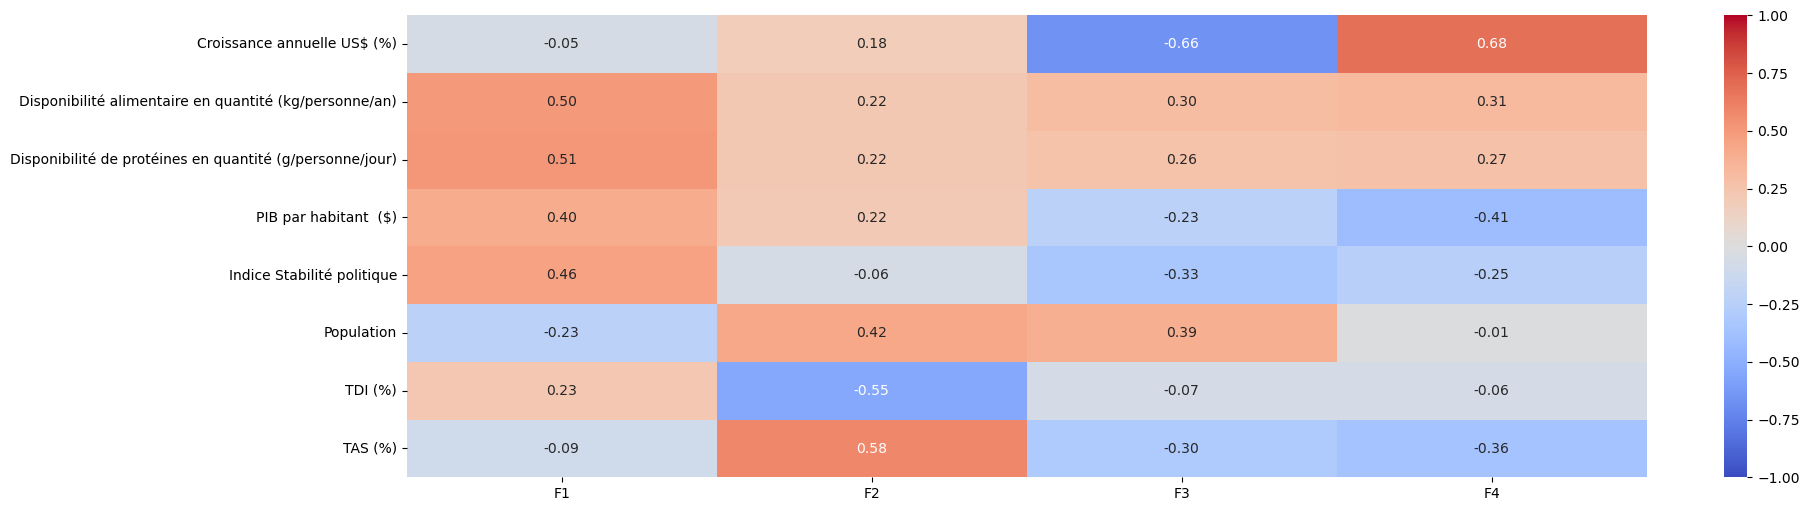

In [136]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [137]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [138]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

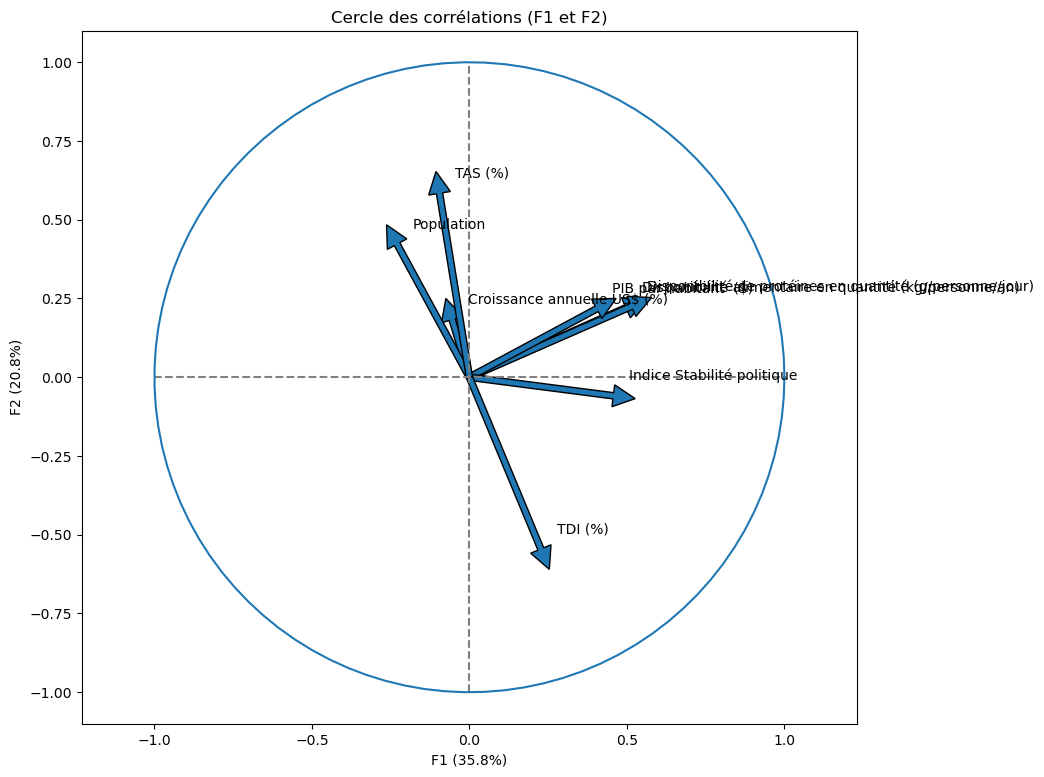

In [139]:
correlation_graph(pca,(0,1),df_acp.columns)

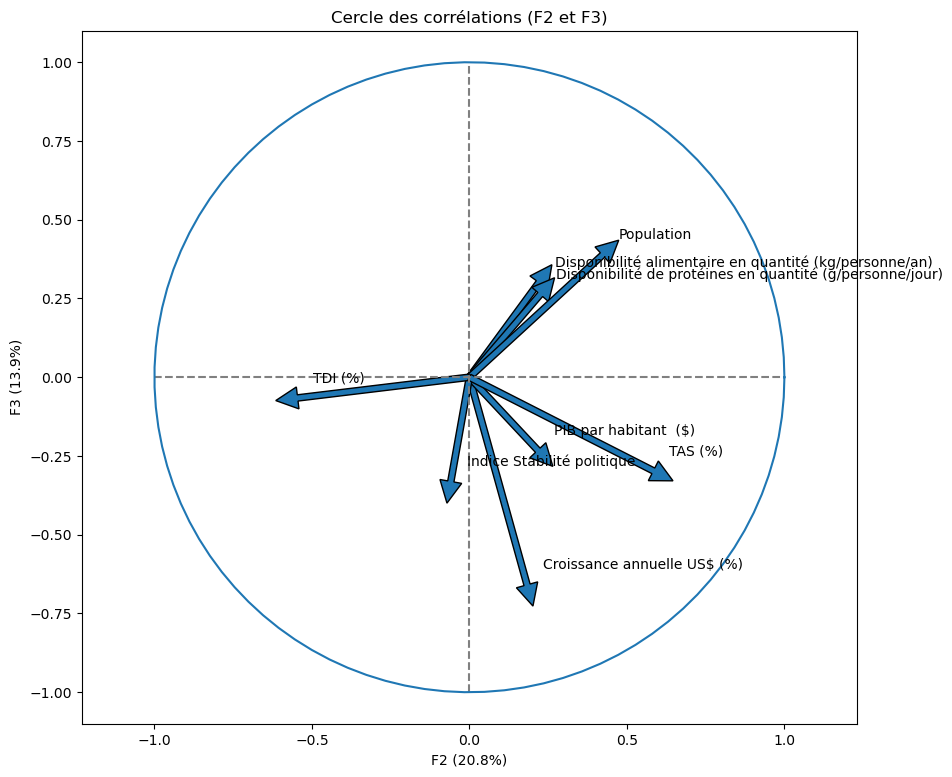

In [140]:
correlation_graph(pca,(1,2),df_acp.columns)

In [141]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3","PC4"])
X_proj[:10]

,PC1,PC2,PC3,PC4
0,-3.000436,-0.760497,0.595552,0.938661
1,0.636224,1.041101,0.937294,1.016711
2,0.245111,-1.331924,-0.297092,0.402013
3,-1.818882,0.351331,0.327575,-0.559506
4,0.800383,1.004565,-0.162089,-0.957930
5,-0.775943,-1.551992,0.321313,0.398763
6,2.978846,-0.659168,0.273871,2.218037
7,1.857302,0.522255,1.391014,0.357510
8,1.086707,1.844756,-0.119234,1.200750
9,-0.389500,-1.282013,0.052045,0.710806


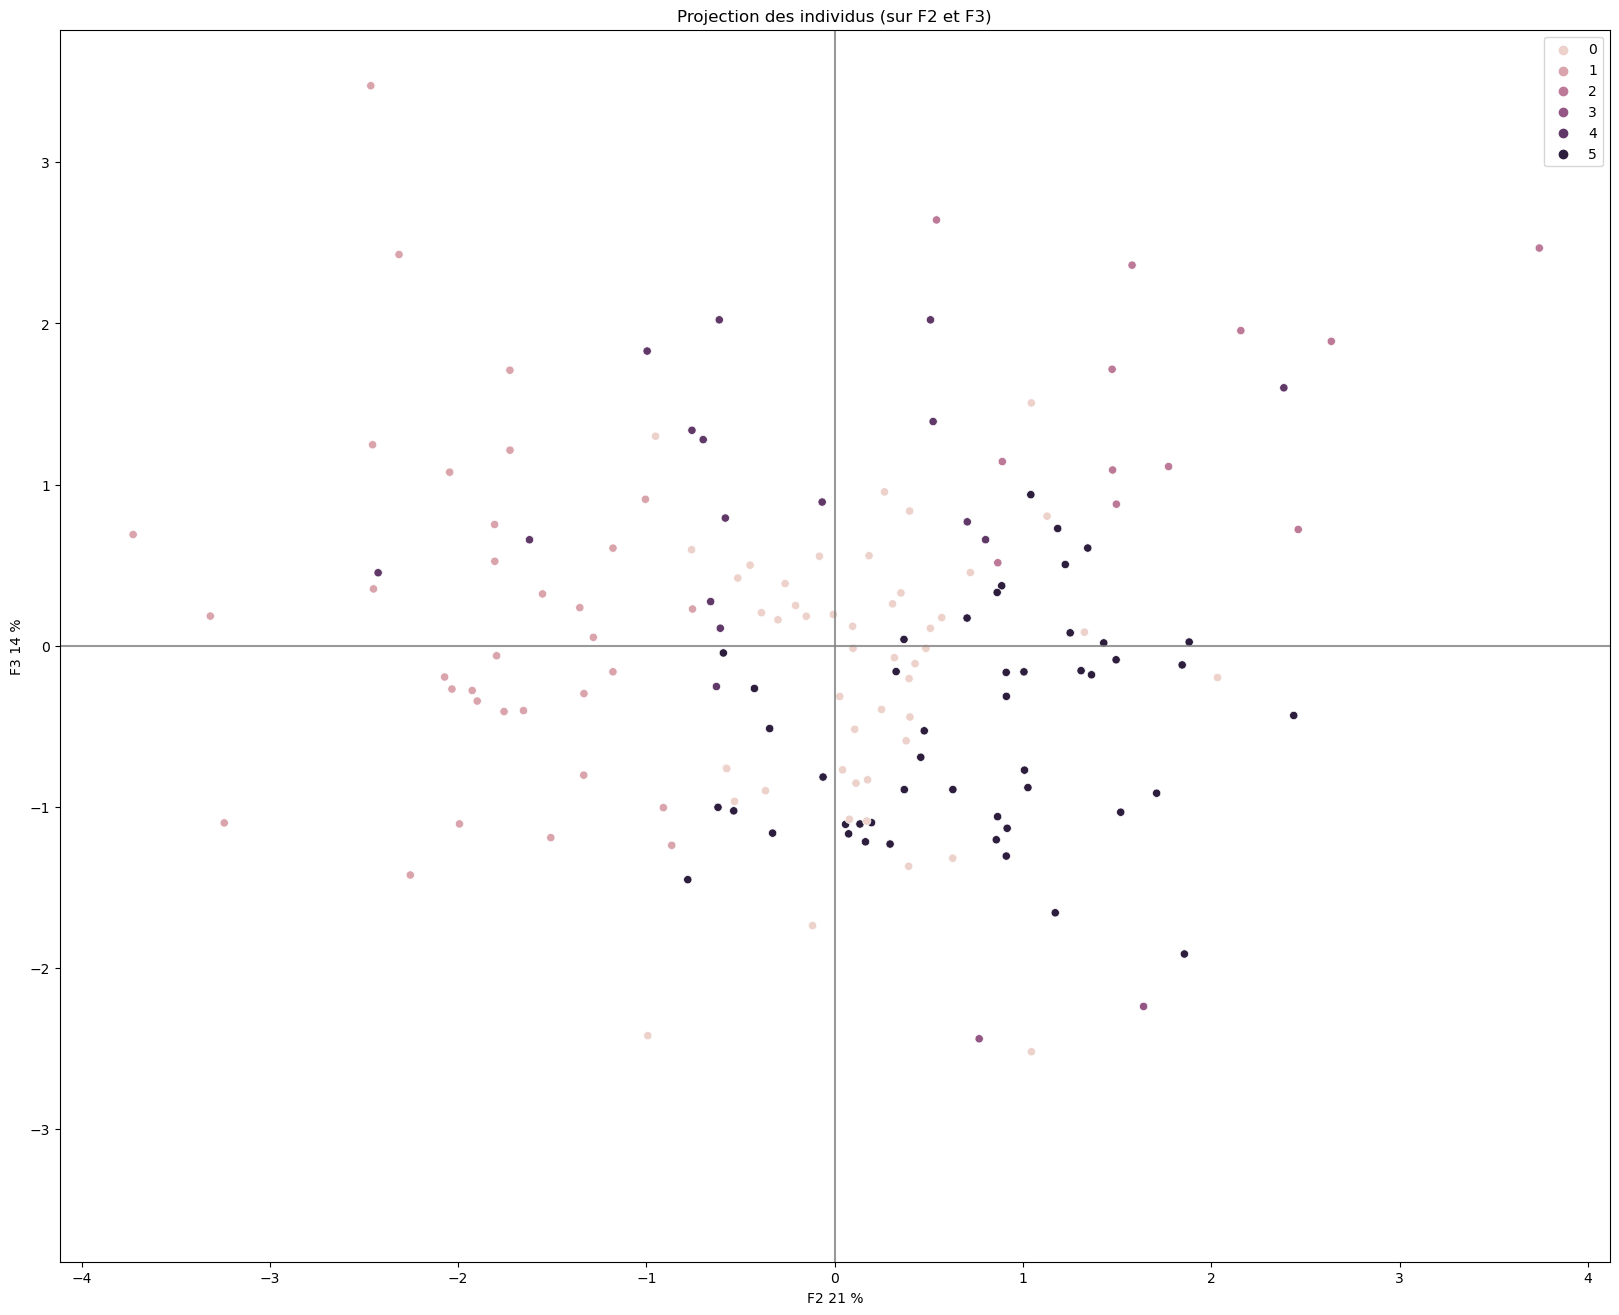

In [142]:
display_factorial_planes(X_proj, [1,2], pca, figsize=(20,16), clusters= labels,marker="o")

<h3> Liens entre factorisation de matrices, ACP, k-means

In [143]:
df_reset_index = df_acp.reset_index()

In [144]:
df_acp

,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
Zone,,,,,,,,
Afghanistan,12.593362,1.53,0.54,2096.1,-2.80,36296113.0,50.88,49.12
Afrique du Sud,10.667160,35.69,14.11,13950.5,-0.28,57009756.0,24.27,78.71
Albanie,10.705471,16.36,6.26,12771.0,0.38,2884169.0,80.85,27.66
Algérie,0.629575,6.38,1.97,11809.5,-0.92,41389189.0,0.72,99.28
Allemagne,7.456452,19.47,7.96,53071.5,0.59,82658409.0,48.42,87.06
...,...,...,...,...,...,...,...,...
Égypte,-26.032905,12.96,4.51,10435.9,-1.42,96442591.0,8.80,89.44
Émirats arabes unis,-16.186703,43.47,14.80,71182.4,0.62,9487203.0,105.10,11.65
Équateur,5.643634,19.31,6.15,11679.4,-0.07,16785361.0,0.00,99.71


In [147]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = sc.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3",'F4'], 
                              index=["cluster_0", "cluster_1", "cluster_2",'Cluster_3', "cluster_4",'Cluster_5'])
centroids_proj

,F1,F2,F3,F4
cluster_0,-1.926646,-0.026810,-0.807569,1.141886
cluster_1,-0.782790,-1.808827,0.731515,-0.632288
cluster_2,-2.193865,1.126347,1.749230,0.218530
Cluster_3,1.101109,0.180860,-1.803309,-1.990084
cluster_4,2.886849,-0.107410,1.339530,0.664567
Cluster_5,0.915344,0.635840,-1.209397,0.597390


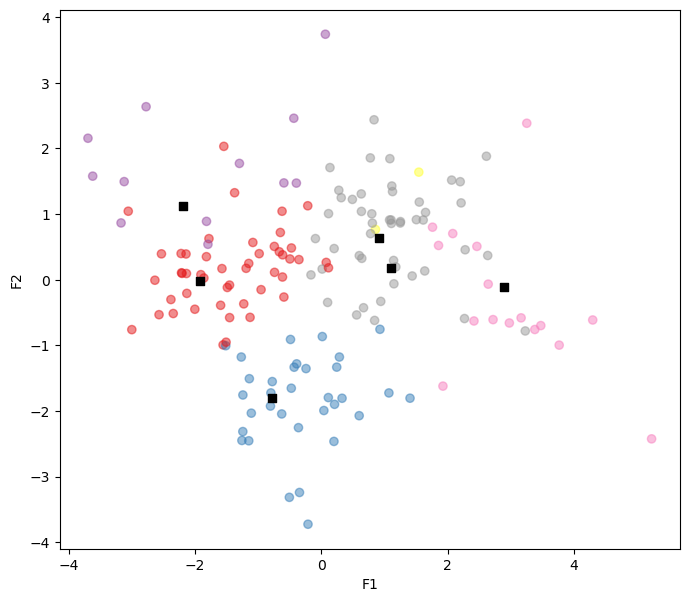

In [148]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Text(0.5, 0, 'F3')

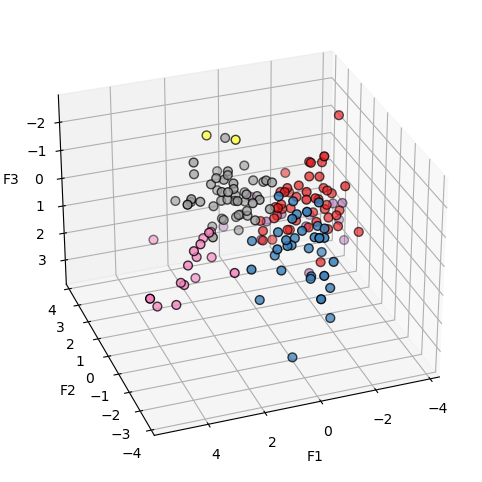

In [149]:
# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40)

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

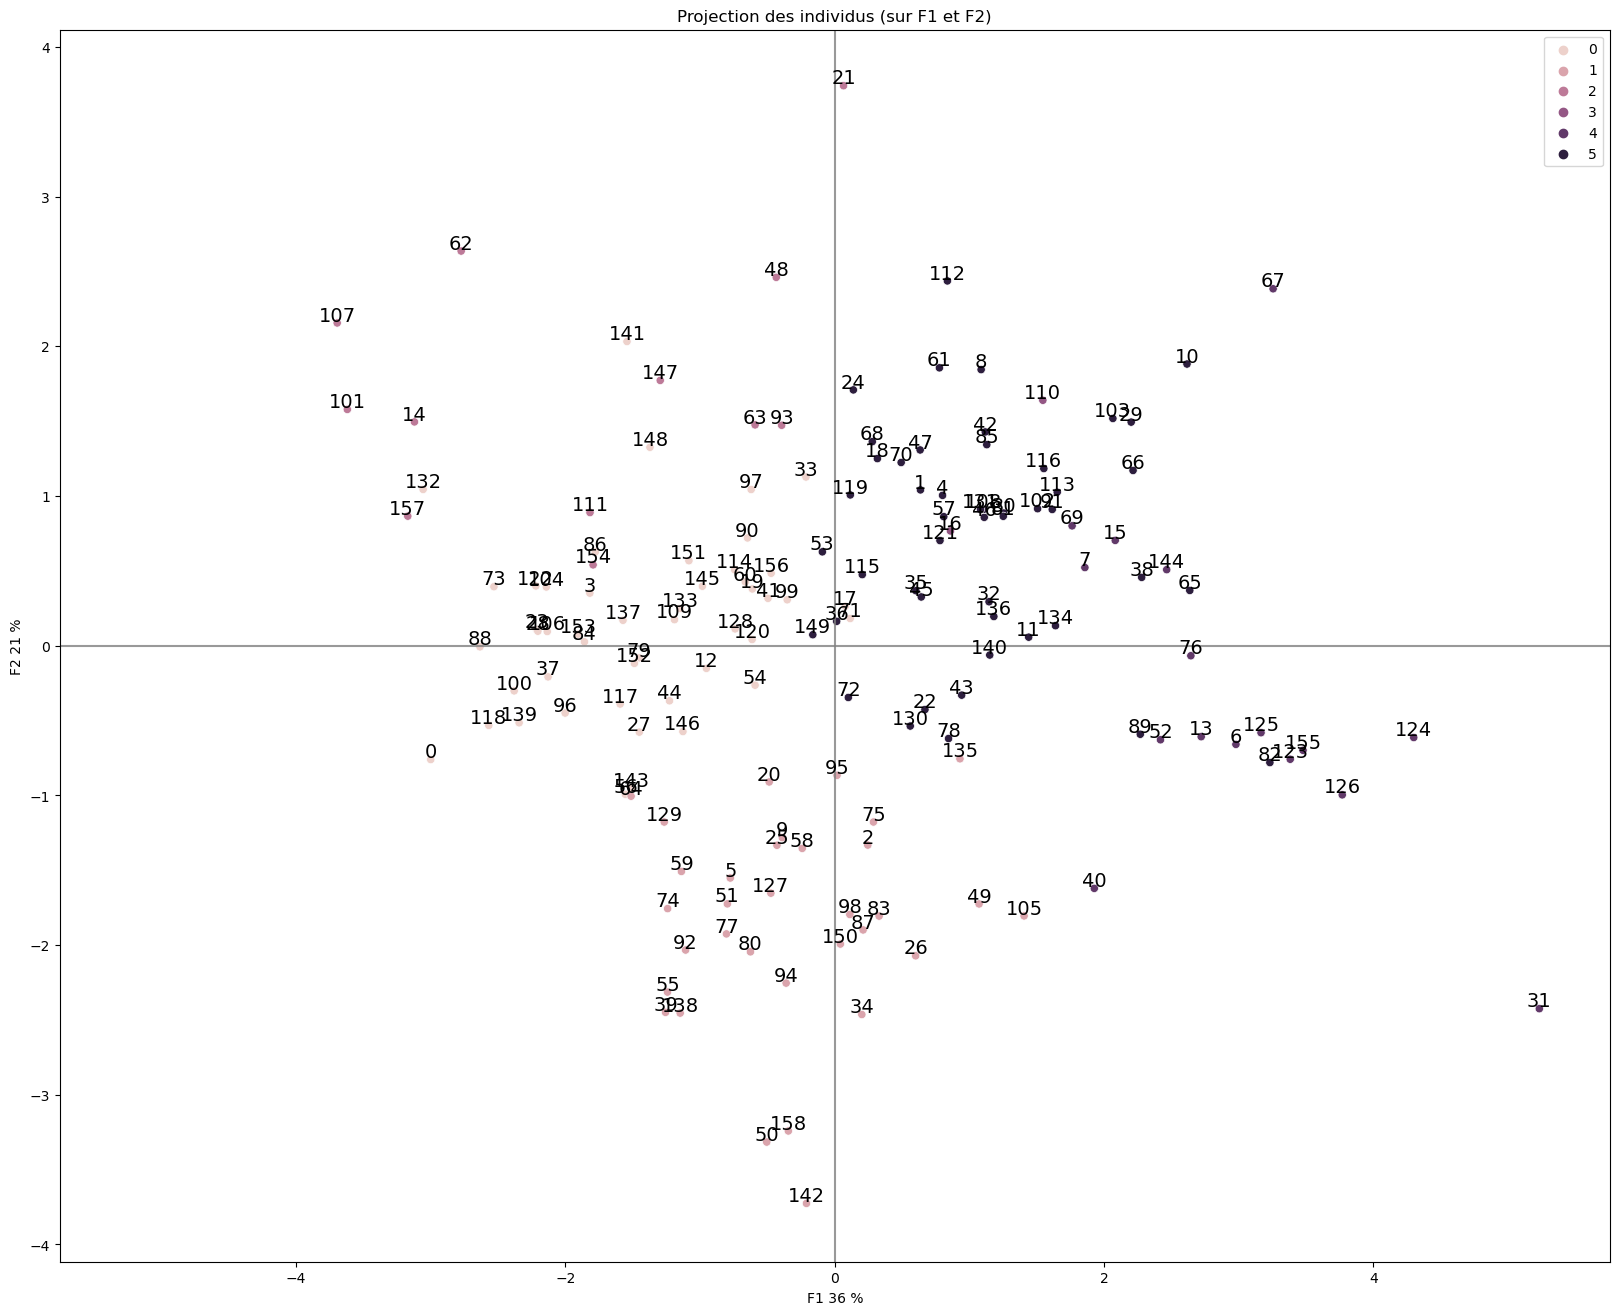

In [150]:
# Analyse du plan factoriel du cluster kmeans
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=df_reset_index.index, figsize=(20,16), clusters=labels, marker="o")

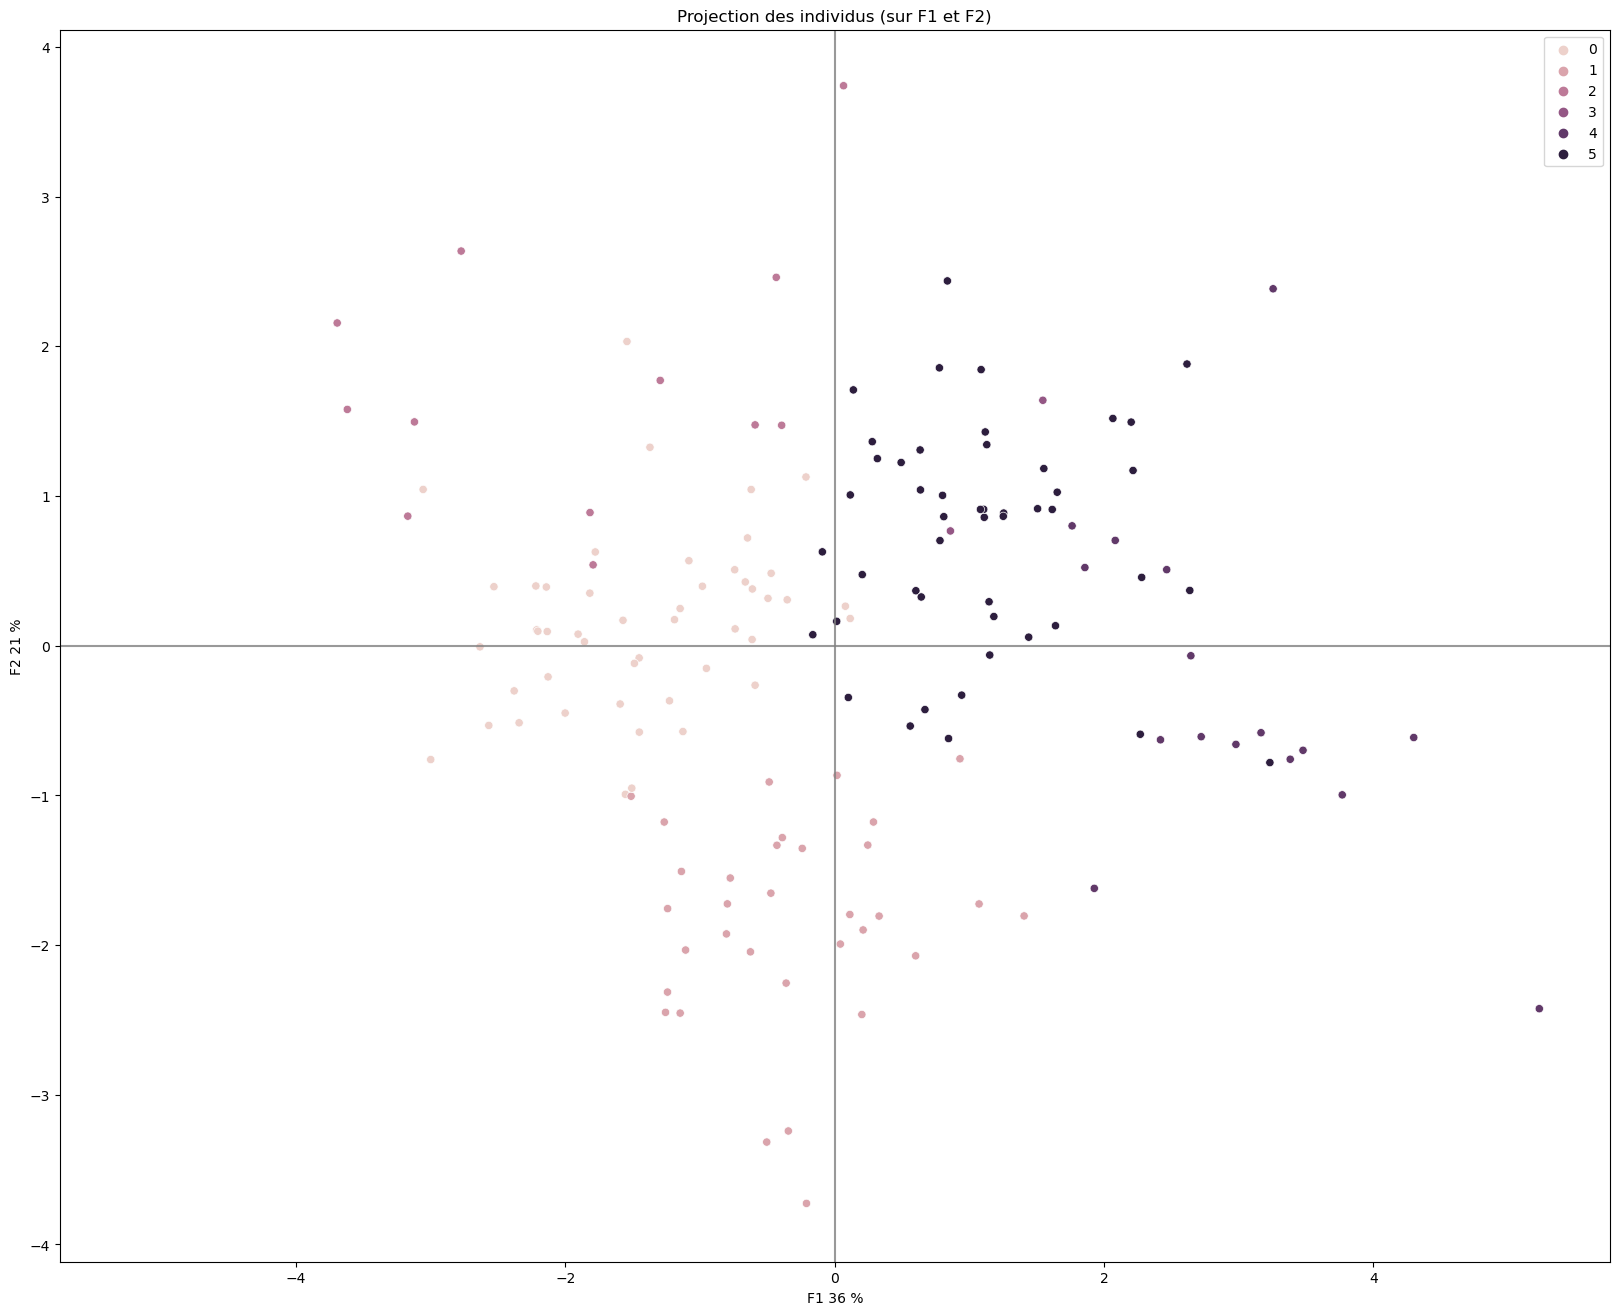

In [151]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=labels, marker="o")

In [152]:
df_reset_index.iloc[[21,31],:]

,Zone,Croissance annuelle US$ (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB par habitant ($),Indice Stabilité politique,Population,TDI (%),TAS (%)
21,Brésil,7.768977,48.03,15.68,14477.9,-0.47,207833823.0,0.03,142.27
31,Chine - RAS de Hong-Kong,7.187729,53.51,22.26,59842.2,0.83,7306322.0,323.93,8.57


<h5> 

Text(0.5, 1.0, 'Heatmap sur les centroïdes de K-means')

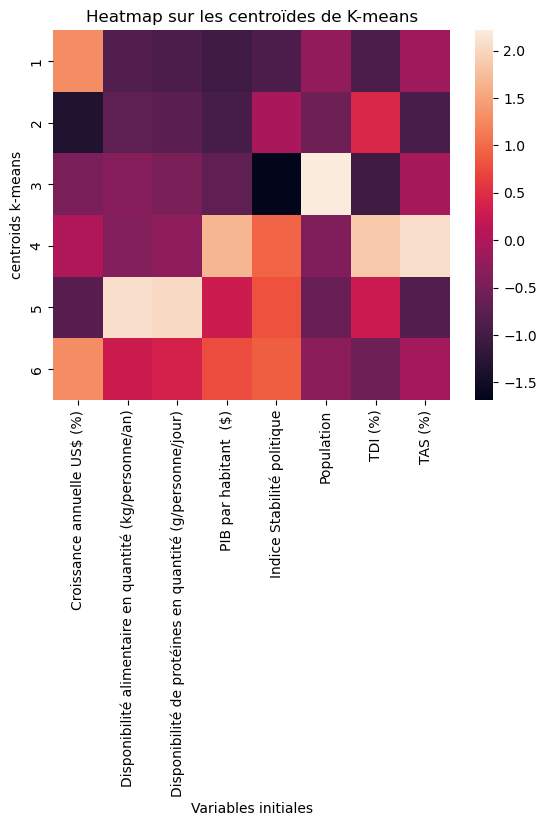

In [166]:
# heatmap du K means

sns.heatmap(centroids_scaled, yticklabels=[1,2,3,4,5,6],xticklabels=df_kmeans.iloc[:,:].columns.tolist())

plt.ylabel("centroids k-means")
plt.xlabel("Variables initiales")
plt.title("Heatmap sur les centroïdes de K-means")

Text(0.5, 1.0, 'Heatmap sur les moyennes des valeurs initiales pour la CAH')

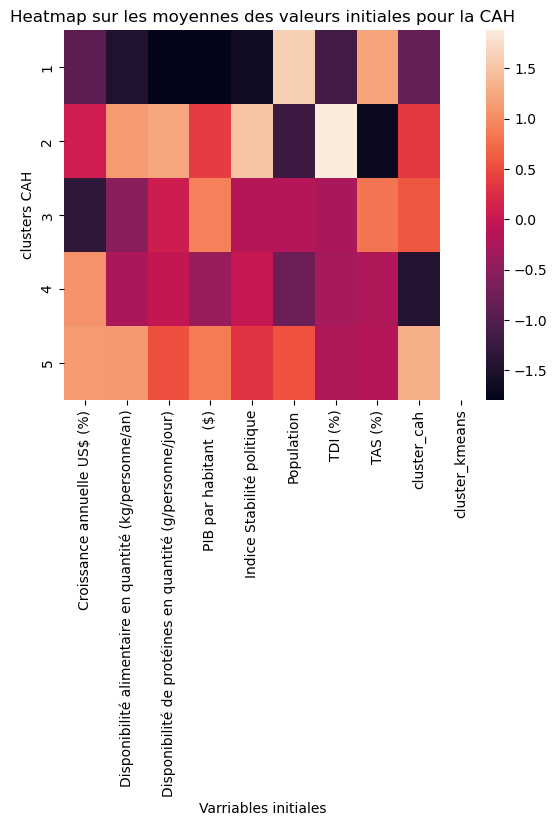

In [165]:
# Heatmap du cah
moy_cah = df.groupby(df["cluster_cah"]).mean()
moy_cah_std_scale = sc.fit(moy_cah)
moy_cah_scaled = moy_cah_std_scale.transform(moy_cah)

sns.heatmap(moy_cah_scaled,yticklabels=[1,2,3,4,5],xticklabels=df.iloc[:,:].columns.tolist())


plt.ylabel("clusters CAH")
plt.xlabel("Varriables initiales")
plt.title("Heatmap sur les moyennes des valeurs initiales pour la CAH")